This python notebook illustrate for a small dust map on the sphere (Nside=128) the different steps to follow:

* To perform rotation-based denoising of a dust map

* To perform patchwork-based denoising of a dust map



In [1]:
import numpy as np
import healpy as hp
import sharedmem as sm
import numexpr as ne
from time import perf_counter
from timeit import Timer
import os
import matplotlib
import matplotlib.pyplot as plt
import math

## Import own library

In [2]:
import sys
sys.path.insert(0, '../alpha-parallel')
import RotationPOUTransform as pou
import PatchworkTransform as patch


## Set up parameters for plotting, DL

In [3]:
%matplotlib inline
nested=False

matplotlib.rcParams['figure.figsize']=[12,8]
plt.rcParams['image.cmap']='jet'#'viridis' before

## Useful paths

In [4]:
root_path=os.getcwd()
data_path=root_path+"/../../data"
approx_path=data_path+"/approx"


## Inputs

NSIDE = 128
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


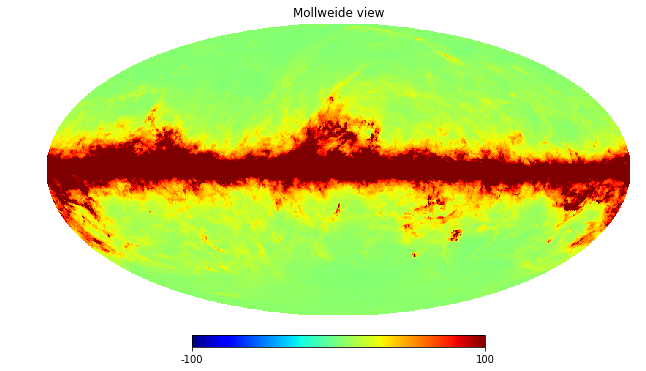

In [5]:
nsideMap=128
npix=hp.nside2npix(nsideMap)
inputdust=hp.read_map(data_path+"/ffp8_thermaldust_nobpm_100_full_map_ns{0}.fits".format(nsideMap)) #Temperature in muK
PatchWidth=5
hp.mollview(inputdust,min=-100,max=100)

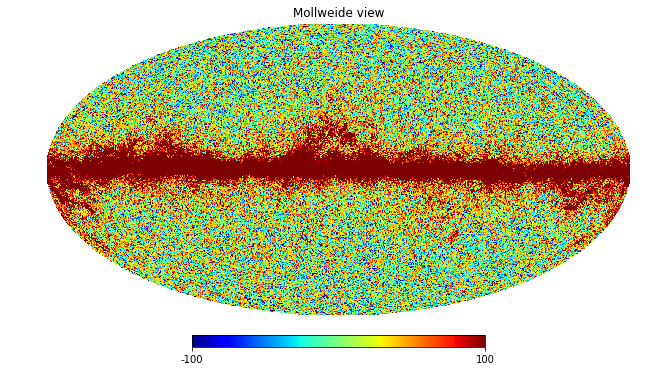

In [6]:
seedNoise=1041978
np.random.seed(seed=seedNoise)
sigmaNoise=45.0
noisyMap=inputdust+np.random.normal(size=(npix))*sigmaNoise
noisy_name=data_path+"/ffp8_thermaldust_nobpm_100_full_map_ns{0}_noisy{1}.fits".format(nsideMap,int(sigmaNoise))
hp.write_map(noisy_name,noisyMap,overwrite=True) #Temperature in muK
hp.mollview(noisyMap,min=-100,max=100)

### Rotation-based approach

#### BEWARE THAT THE CODE ASSUMES A NESTED INPUT

In [7]:
# NOTE: ADJUST THESE PARAMETERS TO YOUR NEEDS !!!
alpha = 0.6
nscale = 3
num_rots=5
real = True
npix=np.size(noisyMap)
plt.figure()
print("sm.cpu_count()                = {0}".format(sm.cpu_count()))
ne_string = "ne.detect_number_of_threads() = {0}"
print(ne_string.format(ne.detect_number_of_threads()))
multipliers= [0.0]*1+[3.0] * (nscale-1)+[4.0]*1 
alphaChar=str(alpha).replace('.','p')
nside = hp.get_nside(noisyMap)

if(num_rots is None):
    output_name=approx_path+'/denoisedPOU_ffp8_thermaldust_100_full_map_0x3x4_rotsdefault_a%s.fits' % (alphaChar)
else:
    output_name=approx_path+'/denoisedPOU_ffp8_thermaldust_100_full_map_0x3x4_rots%d_a%s.fits' % (num_rots, alphaChar)

print("nside = {0}".format(nside))
print("alpha = {0}".format(alpha))
print("number_of_scales = {0}".format(nscale))
print("real = {0}".format(real))
print("Starting (parallel) precomputation of filters...")
par_start = perf_counter()
trafo_pou = pou.PWPOU_TransformParallel(nside, [alpha] * nscale, real=real,num_cores=6,num_rots=num_rots)
par_end = perf_counter()
print_str = "Precomputation of filters finished. Elapsed time: {0} seconds."
print(print_str.format(par_end - par_start))
print("Starting denoising...")
den_im_pou,mask_cover = trafo_pou._denoisePOU(hp.reorder(noisyMap,r2n=True),multipliers= multipliers,
                                            noise_sigma= sigmaNoise)
den_im_pou=hp.reorder(den_im_pou/mask_cover,n2r=True)
hp.write_map(output_name,den_im_pou,overwrite=True)

sm.cpu_count()                = 12
ne.detect_number_of_threads() = 8
nside = 128
alpha = 0.6
number_of_scales = 3
real = True
Starting (parallel) precomputation of filters...


Denoising faces:   0%|                                   | 0/5 [00:00<?, ?rot/s]

Precomputation of filters finished. Elapsed time: 1.234061203955207 seconds.
Starting denoising...
----> rotation is the identity
TRANS GEN
PROCESS eq face 0
PROCESS eq face 1
PROCESS eq face 2
PROCESS eq face 3
PROCESS eq face 4
PROCESS eq face 5
PROCESS eq face 6
PROCESS eq face 7
PROCESS eq face 8
PROCESS eq face 9
PROCESS eq face 10
PROCESS eq face 11


Denoising faces:  20%|█████▍                     | 1/5 [00:05<00:22,  5.53s/rot]

----> rotation is  [0.5154175447295755, 0.0, 0.0]
TRANS GEN
PROCESS eq face 0
PROCESS eq face 1
PROCESS eq face 2
PROCESS eq face 3
PROCESS eq face 4
PROCESS eq face 5
PROCESS eq face 6
PROCESS eq face 7
PROCESS eq face 8
PROCESS eq face 9
PROCESS eq face 10
PROCESS eq face 11


Denoising faces:  40%|██████████▊                | 2/5 [00:11<00:16,  5.67s/rot]

----> rotation is  [-0.5154175447295755, 0.0, 0.0]
TRANS GEN
PROCESS eq face 0
PROCESS eq face 1
PROCESS eq face 2
PROCESS eq face 3
PROCESS eq face 4
PROCESS eq face 5
PROCESS eq face 6
PROCESS eq face 7
PROCESS eq face 8
PROCESS eq face 9
PROCESS eq face 10
PROCESS eq face 11


Denoising faces:  60%|████████████████▏          | 3/5 [00:17<00:11,  5.75s/rot]

----> rotation is  [0.7853981633974483, 1.5707963267948966, 0.0]
TRANS GEN
PROCESS eq face 0
PROCESS eq face 1
PROCESS eq face 2
PROCESS eq face 3
PROCESS eq face 4
PROCESS eq face 5
PROCESS eq face 6
PROCESS eq face 7
PROCESS eq face 8
PROCESS eq face 9
PROCESS eq face 10
PROCESS eq face 11


Denoising faces:  80%|█████████████████████▌     | 4/5 [00:23<00:05,  5.79s/rot]

----> rotation is  [-0.7853981633974483, 1.5707963267948966, 0.0]
TRANS GEN
PROCESS eq face 0
PROCESS eq face 1
PROCESS eq face 2
PROCESS eq face 3
PROCESS eq face 4
PROCESS eq face 5
PROCESS eq face 6
PROCESS eq face 7
PROCESS eq face 8
PROCESS eq face 9
PROCESS eq face 10
PROCESS eq face 11


Denoising faces: 100%|███████████████████████████| 5/5 [00:29<00:00,  5.85s/rot]


<Figure size 864x576 with 0 Axes>

In [8]:
res_pou=den_im_pou-inputdust
print(np.linalg.norm(res_pou)/np.sqrt(npix))

14.919984581234267


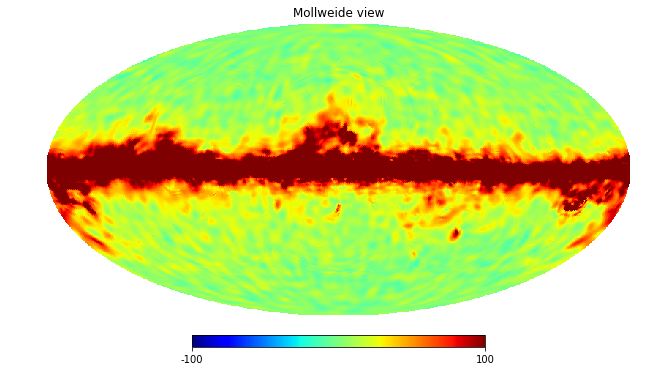

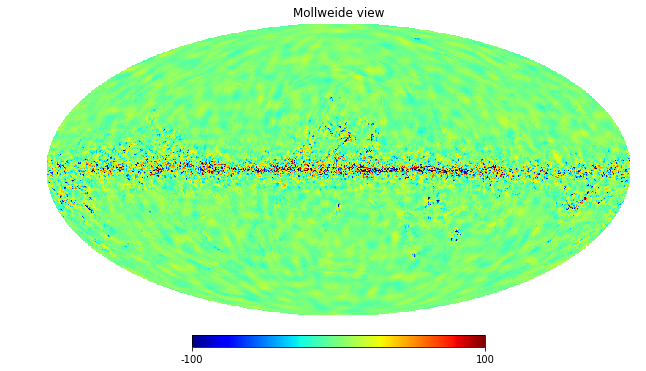

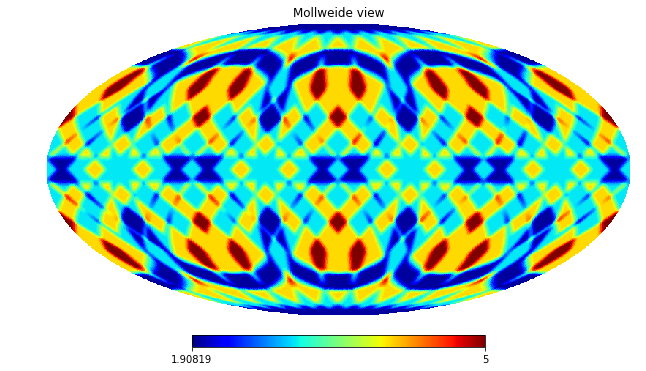

In [9]:
hp.mollview(den_im_pou,min=-100,max=100)
hp.mollview(res_pou,min=-100,max=100)
hp.mollview(hp.reorder(mask_cover,n2r=True))

### Patchwork approach

In [10]:
# NOTE: ADJUST THESE PARAMETERS TO YOUR NEEDS !!!
alpha = 0.6
nscale = 3
real = True
npix=np.size(noisyMap)
plt.figure()
print("sm.cpu_count()                = {0}".format(sm.cpu_count()))
ne_string = "ne.detect_number_of_threads() = {0}"
print(ne_string.format(ne.detect_number_of_threads()))
multipliers= [0.0]*1+[3.0] * (nscale-1)+[4.0]*1 
alphaChar=str(alpha).replace('.','p')
nside = hp.get_nside(noisyMap)
output_name=approx_path+'/denoisedPatch_ffp8_thermaldust_100_full_map_0x3x4_rotsdefault_a%s.fits' % (alphaChar)

print("Starting (parallel) precomputation of filters...")
par_start = perf_counter()
trafo_patch = patch.PW_TransformParallel(nside, [alpha] * nscale, real=real,num_cores=6)
par_end = perf_counter()
print_str = "Precomputation of filters finished. Elapsed time: {0} seconds."
print(print_str.format(par_end - par_start))
print()


sm.cpu_count()                = 12
ne.detect_number_of_threads() = 8
Starting (parallel) precomputation of filters...
Precomputation of filters finished. Elapsed time: 1.1901082260301337 seconds.



<Figure size 864x576 with 0 Axes>

In [11]:
print("Starting denoising...")
coeffs = trafo_patch.transform_generator(hp.reorder(noisyMap,r2n=True))
den_im_patch=hp.reorder(trafo_patch.denoise_transform(coeffs,multipliers= multipliers,noise_sigma=sigmaNoise),n2r=True)
hp.write_map(output_name,den_im_patch,overwrite=True)
res_patch=den_im_patch-inputdust
print(np.linalg.norm(res_patch)/np.sqrt(npix))


Starting denoising...
PROCESS eq face 0
PROCESS eq face 1
PROCESS eq face 2
PROCESS eq face 3
PROCESS polar face 0
PROCESS polar face 1
13.906638244784212


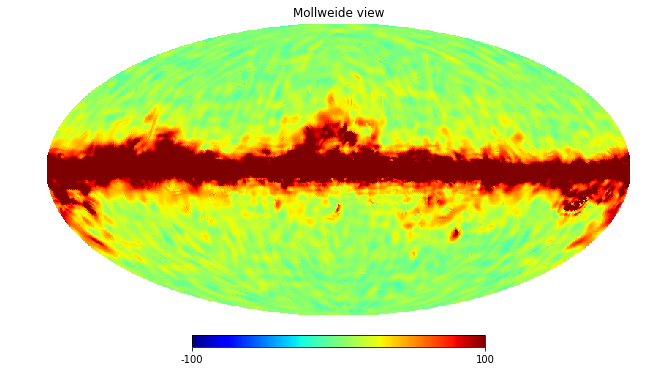

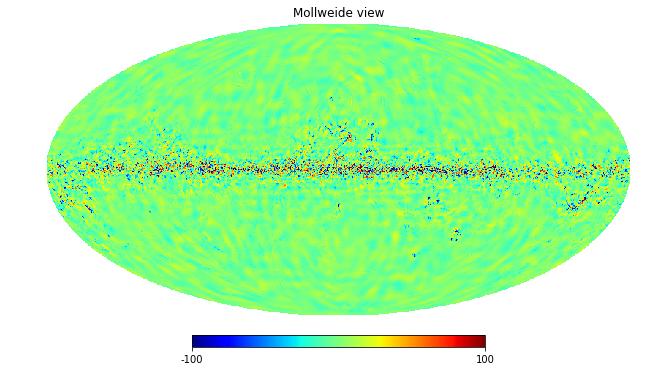

In [12]:
hp.mollview(den_im_patch,min=-100,max=100)
hp.mollview(res_patch,min=-100,max=100)